# Fall 2021 Data Science Intern Challenge

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!

**Question 1**: Given some sample data, write a program to answer the following: 
Dataset - https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one
model of shoe. We want to do some analysis of the average order value (AOV). When
we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13.
Given that we know these shops are selling sneakers, a relatively affordable item,
something seems wrong with our analysis.
   * Think about what could be going wrong with our calculation. Think about a better
     way to evaluate this data.
   * What metric would you report for this dataset?
   * What is its value?

**Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

**Approach** The first step to identify any issue with the current calculation is to obtain and understand the statistics related to the orders (a step in Exploratory Data Analysis (EDA)). This simple task is achieved by using the describe() function on the dataframe resulting from the given dataset.

In [5]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

#Create a dataframe "df_order" from the given dataset for further analysis
df_order = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')

#Obtain statistics of the order values/amounts using describe() using df_order
df_order['order_amount'].describe()


count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

It can be seen that average order value seen is the mean estimated for order_amount in the given dataset. However, it has a surprisingly large standard deviation (41282) with a minimum at 90 and a maximum at 704000. This indicates that the order_amount values are signficantly dispersed around the mean and the presence of such extreme values (outliers) is the cause of unreasonably high average order value.

The next step is to identify how many order_amount entries contribute to the extreme values used in our calculation(outlier analysis). This can be visualized using box plots.

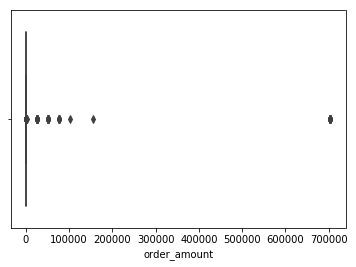

In [6]:
sns.boxplot(x=df_order['order_amount'])

Above box plot indicates that there are quite a few outliers outside the box region almost centered near 0 (probably low 100s because of the scale). Further details of this issue can be investigated by obtaining the number of such high amount orders (i.e., the number of distinct orders for each of the possible outliers observed in the box plot, sorted in descending order by amount).  

In [8]:
dist_order_amt = df_order.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
dist_order_amt.head(20)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


Above information shows that there are 6 extreme order amounts (>25000) while all other amounts are less than 1000. In addition, the number of orders related to order amounts of 25725, 51450 and 704000 are each more than 15, which obviously will significantly skew the results. This investigation can now be focused on the orders related to above order amounts (using index search for above order amounts in our dataframe).

In [9]:
df_order.loc[df_order['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00


Analysing the order information, all the orders with order amount of 704000 have 2000 as order quantity. This seems to be a bulk purchase probably by a wholesale buyer and the average per item would be around 352 in this case. However, orders related to 51450 and 25725 have only 2 and 1 as order quantities respectively, which brings the average item price to 25725. Another interesting point to note is that all these orders are from the same store with id 78. This is a significant anomaly in terms of price, unless this is reported mistakenly in a lower exchange currency value. The shop can be contacted to understand the discrepancy.

The order amount data can be now be further evaluated by removing the outlier order information to get a better estimate of average order value. It is done using the InterQuartile Range and minimum and maximum of whiskers of the box plot as the boundaries.

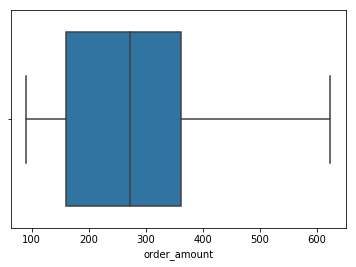

In [10]:
q1 = df_order['order_amount'].quantile(q=0.25)
q2 = df_order['order_amount'].quantile(q=0.5)
q3 = df_order['order_amount'].quantile(q=0.75)
IQR = q3 - q1

order_excl_outliers = df_order[(df_order['order_amount'] < q2 + IQR * 1.5) & (df_order['order_amount'] > q2 - IQR * 1.5)]
sns.boxplot(x = order_excl_outliers['order_amount'])

Removing the large outliers now indicates that the order amounts are all less than 600 which median close to 280. This value seems to be a more representative number for the average order value.

**What metric would you report for this dataset?**
From above observation, the median value is a more representative metric for the average order value.

**What is its value?**
The value of median from original statistics is 284, which is a good representation of the average order value.

**Question 2**: For this question you’ll need to use SQL. Follow this link (https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set
required for the challenge. Please use queries to answer the following questions. Paste your
queries along with your final numerical answers below.
* How many orders were shipped by Speedy Express in total?
* What is the last name of the employee with the most orders?
* What product was ordered the most by customers in Germany?

**How many orders were shipped by Speedy Express in total?**
The information required for this query is stored in 2 tables - Orders and Shippers. A query joining these two tables (using ShipperID) with specific shipper name condition as "Speedy Express" is shown below.

            SELECT COUNT(*)
                FROM [Orders]
                JOIN [Shippers]
                    ON [Shippers].ShipperID = [Orders].ShipperID
                WHERE [Shippers].ShipperName = "Speedy Express";
                
The result of the query: the number of orders shipped by Speedy Express is **54**

**What is the last name of the employee with the most orders?** 
This query requires combining information from 2 tables - Orders and Employees (using EmployeeID). Further, the order details related to each employee need to be grouped and sorted to obtain the information of the employee with most orders. The resulting query is shown below:

    SELECT [Employees].LastName, COUNT(*) AS TotalQuantity
           FROM [Orders]
           JOIN [Employees]
           ON [Orders].EmployeeID = [Employees].EmployeeID
           GROUP BY [Employees].LastName
           ORDER BY TotalQuantity DESC
           LIMIT 1;
           
The result of the query: Employee with last name **Peacock** had the most orders (**40**).

**What product was ordered the most by customers in Germany?** 
This requires a quite complex query because the key data (product name, total quantity, country) are spread across 3 tables ("Products", "Customers","OrderDetails") with a connected fourth table in "Orders". It requires multiple joins among these tables with a condition of country name as "Germany".

**Logical Stepthrough** - The first step involves combining "Customers" and "Orders" to get all the orders by customers from "Germany". Use these relevant OrderID data with "OrderDetails" table to get total quantity ordered for each ProductID (requires grouping and join with "Products"). The combined table can be sorted on total quantity to get the most ordered product from customers in Germany.

    SELECT [Products].ProductName,SUM([OrderDetails].Quantity) AS "TotalQuantity"
        FROM [Orders]
        JOIN [Customers]
            ON [Customers].CustomerID = [Orders].CustomerID
        JOIN [OrderDetails]
            ON [OrderDetails].OrderID = [Orders].OrderID
        JOIN [Products]
            ON [Products].ProductID = [OrderDetails].ProductID
        WHERE [Customers].Country = 'Germany'
        GROUP BY [OrderDetails].ProductID
        ORDER BY TotalQuantity DESC;
        
 The result of query: The product "**Boston Crab Meat**" is most ordered by customers in Germany with a total quantity of **160**.